# ADM - HW2 - Instagram Profiles & Posts

## Libraries & Setup

In [1]:
import pandas as pd   # Data manipulation and analysis

from collections import Counter   # For keeping count

import warnings
warnings.filterwarnings('ignore')

import functions

In [2]:
profiles_df = pd.read_csv(r'D:\Data\instagram_profiles.csv', delimiter='\t', converters={"profile_id": str})
locations_df = pd.read_csv(r'D:\Data\instagram_locations.csv', delimiter='\t', converters={"id": str})

In [4]:
posts_reader = functions.initialize_posts_reader()

# Research questions

## [RQ1] *Exploratory Data Analysis (EDA)*

This report will utilize 3 different datasets obtained from kaggle, namely "instagram_profiles.csv", "instagram_posts.csv" and "intagram_locations.csv", and we will mention them as the profiles, posts and locations dataset.

### Exploring the profiles dataset

In [1]:
functions.EDA(functions.read_csv(None, 'instagram_profiles.csv', 6))

Read 4509586 rows and columns from instagram_profiles.csv!
The dimensions of the dataset:  (4509586, 11)
The names of the columns:  sid, profile_id, profile_name, firstname_lastname, description, following, followers, n_posts, url, cts, is_business_account
Columns with missing values and their percentage of missing data: 
profile_id              0.719512
firstname_lastname      6.396707
description            45.591680
following              23.434856
followers              23.434856
n_posts                23.434856
url                    80.701687
cts                     9.723465
is_business_account    23.600016

Possible categorical values in the data:  is_business_account    2

Number of duplicates in the data:  0

          following     followers       n_posts
count  3.452771e+06  3.452771e+06  3.452771e+06
mean   1.405641e+03  4.739899e+03  4.095414e+02
std    8.113473e+03  1.939087e+05  1.041940e+03
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.560000e+02  1.590000e+0

We see that there are many missing data. Some are missing since it is not a mandatory field that a user that must fill out. For example, the variable 'url' is an external link that accounts can display in their profile and it is optional. Similar with description. We can not differentiate between values that were not collected versus the values that were left empty by the users. Another thing we can observe is that "following", "followers", "n_posts" and "is_business account" have the same percentage of missing values. One reason could be that the accounts were suspended or frozen by the user.

The variables following, followers and number of posts have the minimum value 0, there are only positive values. The mean is larger than the median for all variables thus indicating the distrubution may be skewed to the right.

### Exploring the posts dataset

In [1]:
functions.EDA_for_posts()

The dataset has 42710197 rows and 10 columns.
The names of the columns are: sid, sid_profile, post_id, profile_id, location_id, cts, post_type, description, numbr_likes, number_comments
Columns with missing values and their percentage of missing data: 
profile_id           6.04842
location_id        30.373946
cts                 0.007801
description         9.354693
numbr_likes         0.000084
number_comments     0.000084

Possible categorical values in the data:  post_type    3

Descriptive statistics: 
                 min        max        mean          std
numbr_likes      0.0  8822952.0  283.503046  6124.611228
number_comments  0.0   488953.0    7.595308    194.14764


The posts dataset has 10 columns and 3 of them contain missing values. The variable description is an optional field when publishing a post therefore it is not surprising that it has missing values. The other two variables are the number of likes and comments. It is not surprising that these variables have missing values. Post type has 3 unique values and we know that they refer to 'photos', 'videos' and 'both'. There are no duplicated in the data. The only numerical variable that belongs to the posts dataset is the number of comments per each post. Compared to its standard deviation, it has a very low mean and even a lower median. There is also a big gap between the 75th percentile and the maximum value of the number of comments. This indicates that there are some outliers in the dataset.

### Exploring the locations dataset

In [1]:
functions.EDA(functions.read_csv(None, 'instagram_locations.csv', 2))

Read 1022658 rows and columns from instagram_locations.csv!
The dimensions of the dataset:  (1022658, 23)
The names of the columns:  sid, id, name, street, zip, city, region, cd, phone, aj_exact_city_match, aj_exact_country_match, blurb, dir_city_id, dir_city_name, dir_city_slug, dir_country_id, dir_country_name, lat, lng, primary_alias_on_fb, slug, website, cts
Columns with missing values and their percentage of missing data: 
street                    30.015313
zip                       30.027536
city                       8.359784
region                    99.827899
cd                         8.179470
phone                     41.164299
aj_exact_city_match        2.165729
aj_exact_country_match     2.165729
blurb                     60.230595
dir_city_id               51.528468
dir_city_name             51.528468
dir_city_slug             51.575111
dir_country_id            51.535313
dir_country_name          51.528468
lat                        0.602645
lng                        0

The dataset locations contains 23 columns and 20 of them have missing values. Many of them will not be relevant for our analysis. There are no meaningful numerical values to investigate its distribution.

### Distrubutions of numerical variables

Read 42710197 rows and columns from instagram_posts.csv!
Read 4509586 rows and columns from instagram_profiles.csv!
Standard scale histograms up till 95th percentile


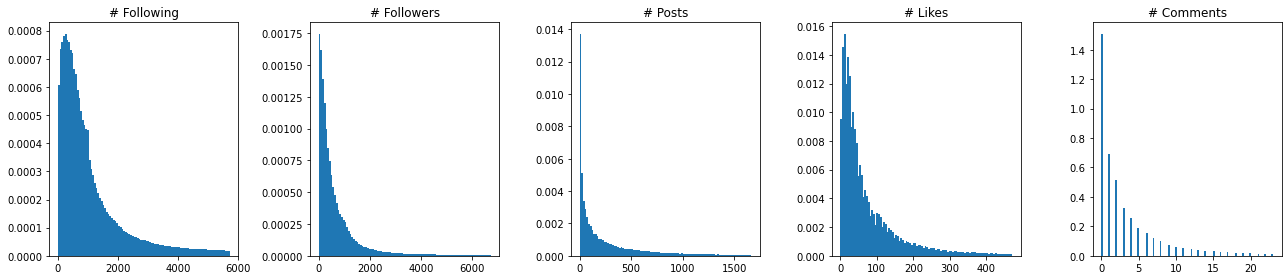

Log scale histograms up till 95th percentile


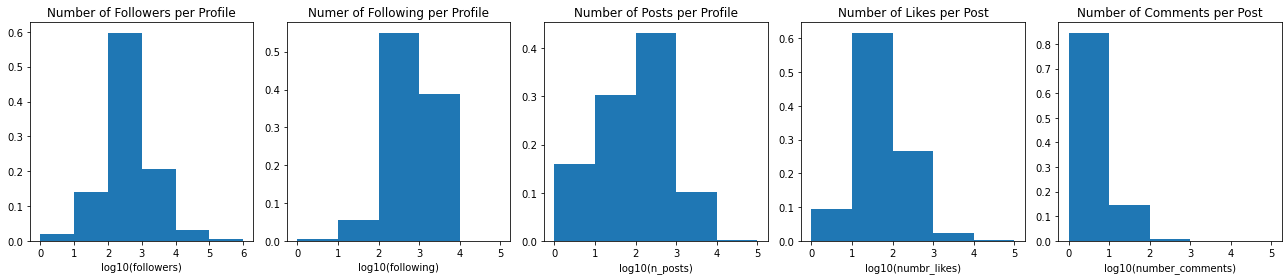

In [2]:
functions.plot_hists_eda()

Above are the histogram for numerical variables that can be found in the profiles and posts datasets. 

For the standard-scale histograms, we can see that the distrubutions are skewed towards the right. This is telling about the nature of the platform we are investigating. In instagram, overwhelming majority of the users have a small number of the metrics above. Meanwhile, there are also very influential users with a large number of followers. There are users that share daily news that has a very high number of posts. Overall there is a similar behavior wihin the majority of the users, while there are users that are extremes.

In the log-scale histograms it is visible that which percentage of users belong to which group. More than 50% of the users have between 100-1000 followers, and more than 60% of the users are fallowing 100 to 1000 accounts.

## [RQ2] *Insights regarding profiles and posts*

<h3>2.1 Profiles ordered by number of posts </h3>

In [148]:
# Remove NaN values from fields we are interest in
profiles_df = functions.adjustProfDf(profiles_df)

In [150]:
## Sorting profiles by number of posts in descending order, 
## so that the profile that posts the most will be displayed first
profiles_df = profiles_df.sort_values(by='n_posts', ascending=False)

In [151]:
profiles_df

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,199664772,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8563366588,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1273455368,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9813508,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1607309412,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,243807285,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:06.271 -0400,NaN
4509577,4184452,656779598,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:23.911 -0400,NaN
4509582,4184469,13407035,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6007353778,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN


Plot of the first thirty profiles that post the most. As we can se, after the first two profiles, the number of posts start getting really similar between the profiles, even if keeps descending.

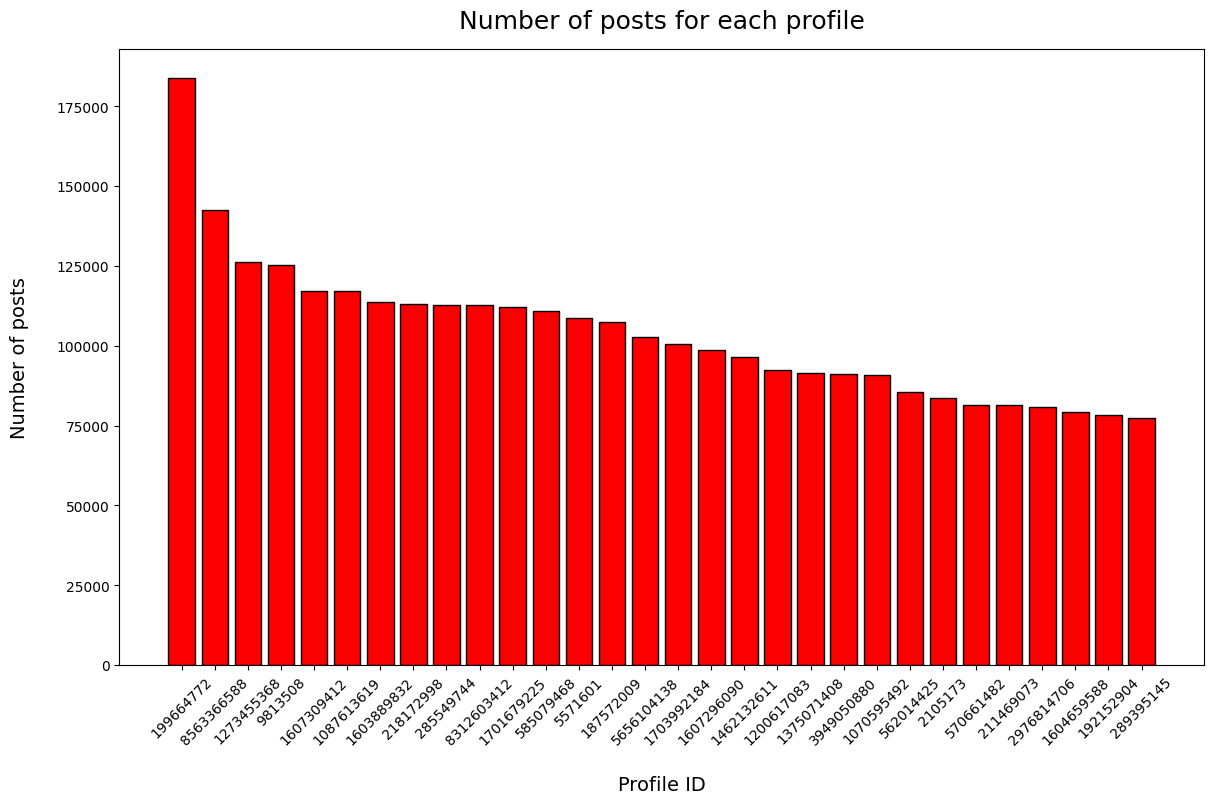

In [153]:
top_thirty = profiles_df.head(30)
functions.plot_n_posts(top_thirty)

<h3>2.2 Posts with the higher number of likes</h3>

In [154]:
# Read the posts data and compute all the info that we need 
infoDict = functions.computeCommentsLikesLocationAndType()
most_liked_posts = infoDict['mostLikedPosts']
most_commented_posts = infoDict['mostCommentedPosts']
least_commented_posts = infoDict['leastCommentedPosts']
type_counter = infoDict['typeCounter']
location_counter = infoDict['locationCounter']

In [8]:
# Compute the most liked posts over the final set. This is done by sorting
# in descending order the posts by number of likes.
most_liked_posts = most_liked_posts.sort_values(by='numbr_likes', ascending=False)
most_liked_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
19624085,4768909,531404,Bt3yaXmAM0d,4.906778e+07,,2019-02-14 18:07:43.000,1,"You make me very happy. Happy Valentine’s Day,...",8822952.0,165886.0
19623988,4768904,531404,BuwffB7g8cK,4.906778e+07,,2019-03-08 18:39:02.000,1,I am so in awe of @colesprouse and @haleyluhoo...,5447066.0,25303.0
19624082,4768906,531404,Buc1gyZAaMQ,4.906778e+07,,2019-03-01 03:26:42.000,1,"Thinking of you, Luke. And praying for your sa...",5116398.0,40608.0
19623986,4768902,531404,BvcukE8AMuG,4.906778e+07,,2019-03-25 22:57:23.000,1,Hire us to perform at your sweet sixteen X,4271466.0,30770.0
39701024,25302472,470575,BqSLFVBFLfq,4.275539e+08,321418175024105.0,2018-11-17 14:57:59.000,1,NaN,4264745.0,18691.0
...,...,...,...,...,...,...,...,...,...,...
22266891,6572219,1250188,BvnMviwFRlC,3.587997e+06,214895019.0,2019-03-30 00:33:30.000,1,rolês improváveis: yoga com cabras #MinhaCalif...,39627.0,367.0
22429907,6735293,1207318,Bvg76TOhTyu,7.498841e+06,,2019-03-27 10:10:59.000,1,Thank you to my superstar team @bjpascual 📸 @r...,38953.0,97.0
22399538,6705111,1201765,BvBnwadAxGt,5.591062e+09,,2019-03-15 06:18:24.000,1,Rip fizzy you beautiful little soul x 🙏😞💫 x,38672.0,716.0
22041993,6347003,1139302,BtoUx5AgDkX,1.769455e+08,,2019-02-08 18:00:11.000,1,But how does it happen? Check out this stunnin...,37781.0,73.0


<h3>2.3 Posts with the highest and smallest number of comments</h3>

Posts with the highest number of comments. The post with the highest number of comments has 488953 comments.

In [9]:
# Compute the most commented posts over the final set by sorting them in descending order.
most_commented_posts = most_commented_posts.sort_values(by='number_comments', ascending=False)
most_commented_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
41873060,27503892,-1,Bx2sPAjHviO,1.635670e+09,244000222.0,2019-05-24 20:00:04.000,1,Anne Oğul 🧡,38871.0,488953.0
12164781,39701672,3940995,BuGjhWAhAW5,4.282994e+08,,2019-02-20 12:46:12.000,1,When you scared to jump . Thats is exactly whe...,81523.0,313997.0
33261751,9952351,3335216,BJ-rkpTgn1N,5.533645e+07,375314645.0,2016-09-05 17:32:27.000,1,💋💋💋❤️,54507.0,257488.0
11149127,22594279,3831202,BMtisIxjhtT,5.697152e+06,277222335949200.0,2016-11-12 14:21:55.000,1,Кавайная я! 💕🌟☺️,331703.0,214365.0
9383817,37533033,3637382,BzOOWj3DfZK,1.062916e+09,,2019-06-27 19:54:33.000,1,💬 H E D İ Y E M İ Z VAR .\n. KAZANAN kişiye >...,23515.0,189888.0
...,...,...,...,...,...,...,...,...,...,...
23648115,7954871,2302795,Bv45C9yHHxs,1.782301e+08,,2019-04-05 17:27:43.000,1,Have you finished yet? ... Binging part 2 😏,145199.0,2517.0
19069247,4184132,692635,Bvc2rnPlIYo,1.922540e+09,1073274452813521.0,2019-03-26 00:09:51.000,1,We are partnering up with @chicklet.hf and @ma...,2602.0,2098.0
19065147,4179862,693331,BVWXwj7BJeC,5.397124e+09,,2017-06-15 06:06:25.000,1,森羅万象ににて紅葉に芸術に春夏秋冬に歌の練習\n駆け引きに音楽に芸術に基本的素敵な晩餐です\...,18152.0,1940.0
19069248,4184134,692635,BvcCs7ZFxHf,1.922540e+09,212988663.0,2019-03-25 16:34:07.000,1,We are partnering up with @chicklet.hf and @ma...,8190.0,1813.0


Posts with the smallest number of comments. The post with the smallest number of comments has 0 comments.

In [10]:
# Compute the least liked posts over the final set by ordering the DataFrame by number of comments,
# this time in ascending order since we want the smallest number of comments
least_commented_posts = least_commented_posts.sort_values(by = 'number_comments', ascending = True)
least_commented_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1022366247837915.0,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
28246768,12721525,1562826,Bvio_PvFC93,9.818463e+08,,2019-03-28 02:04:06.000,1,bibi💫,8.0,0.0
28246769,12721540,1562826,Bu_k7oLlFjJ,9.818463e+08,,2019-03-14 11:15:15.000,1,EMMMMMM,11.0,0.0
28246770,12724989,1563363,Bu83azpHRKl,1.743359e+09,,2019-03-13 09:59:04.000,1,NaN,13.0,0.0
28749999,13322257,1668133,Bb3Z94ZDuYD,9.830111e+08,,2017-11-24 06:09:01.000,1,Haha stole the phone 😊😊,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14687538,41907907,4313621,B0wcxUXBXTA,1.049341e+10,1386062.0,2019-08-04 23:23:41.000,1,Défilé sur le char pour les filles #feteafanfo...,10.0,0.0
14661711,41885020,4310276,BtaE54Yh0hV,1.012397e+10,330597027.0,2019-02-03 06:12:05.000,1,I think that this picture is beautiful in blac...,11.0,0.0
14661712,41885022,4310276,BtaESMwBBKb,1.012397e+10,330597027.0,2019-02-03 06:06:40.000,1,All that you see in that is dead will be live ...,13.0,0.0
14812261,42017371,4328793,Bw4WmXRBb-M,1.959402e+08,374193518.0,2019-04-30 14:58:07.000,1,Places I’d rather be @baigent1992 ☀️#Palma #Ma...,25.0,0.0


<h3>2.4 Number of posts with or without tagget location </h3>

Based on the sample we have, we can say that almost one third of the posts have registered location.

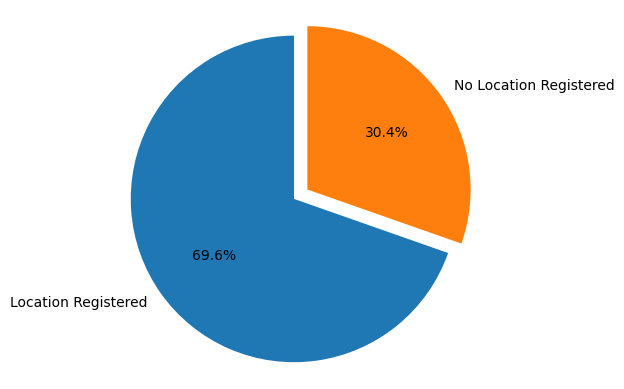

In [134]:
#Given location values computed earlier, we compute a pie chart using matplotlib.pyplot built in tools.
functions.plot_location_registered(location_counter)

<h3>2.5 Number of only-photo posts and mixed posts</h3>

As we can see from the analysis of our sample, the number of photos-only posts is more than a thousand times bigger than the mixed posts.

In [161]:
## Printing the number of only-photo posts and mixed posts

print('Only photo posts {}.'.format(type_counter['1']))
print('Mixed (videos and photos) posts {}.'.format(type_counter['3']))


Only photo posts 41534486.
Mixed (videos and photos) posts 40943.


<h3>2.6 Business accounts vs Non-Business Accounts</h3>

This time, for NaN values, we did not assume a default value. Hence, we can see that our dataset has a pretty big percentage of missing values for the 'is business account' field.
Nevertheless, we can see that the percentage of non-business accounts is much bigger than the business-accounts' one.

Business accounts are 18.9652% of the total
Non-Business accounts are 57.4347% of the total
NaN-Business accounts are 23.6% of the total


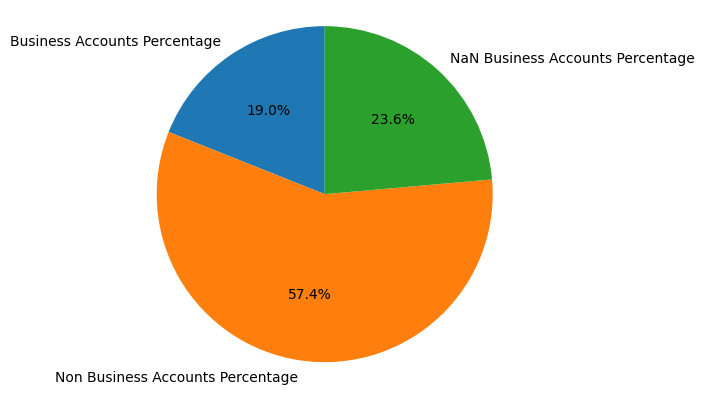

In [158]:
business_perc, non_business_perc, NaN_business_perc, business_perc_withoutNaN, non_business_perc_withoutNaN = functions.getBusinessAccountPercentage(profiles_df)

## Printing the percentage of business account vs the percentage non-business account 
## vs the percentage of accounts for which we do not know this value

print('Business accounts are {}% of the total'.format(business_perc))
print('Non-Business accounts are {}% of the total'.format(non_business_perc))
print('NaN-Business accounts are {}% of the total'.format(NaN_business_perc))

functions.plot_business_accounts_withNaN(business_perc, non_business_perc, NaN_business_perc)

This becomes more clear here. This times, we did not take into account NaN values and only plotted the business accounts percentage vs non-business accounts percentage. 
From this chart, we can see that, in our sample, business accounts are a fourth of the total. This makes sense if you think that Instagram was born as a platform mainly addressed to individuals.

Business accounts are 24.8236% of the total
Non-Business accounts are 75.1764% of the total


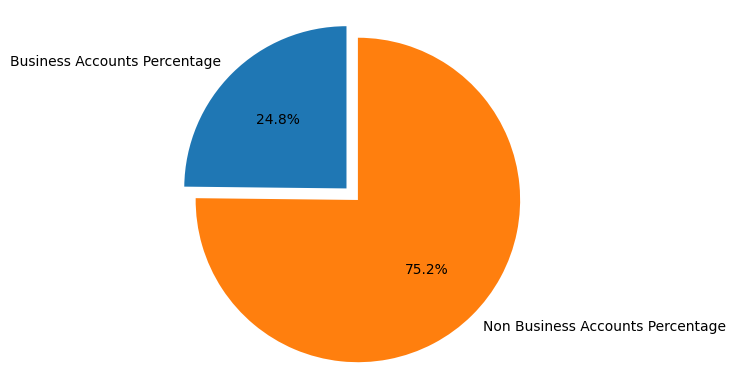

In [159]:
## Printing the percentage of business account vs the percentage non-business account 
## The percentage is calculated on number of accounts - number of accounts with 'is_business_account' = NaN

print('Business accounts are {}% of the total'.format(business_perc_withoutNaN))
print('Non-Business accounts are {}% of the total'.format(non_business_perc_withoutNaN))

functions.plot_business_accounts_withoutNaN(business_perc_withoutNaN, non_business_perc_withoutNaN)

## [RQ3] *Temporal analysis of publishing behavior*

In [8]:
posts_reader = functions.initialize_posts_reader()

In [9]:
posts_time = functions.retrieve_posts_time(posts_reader)

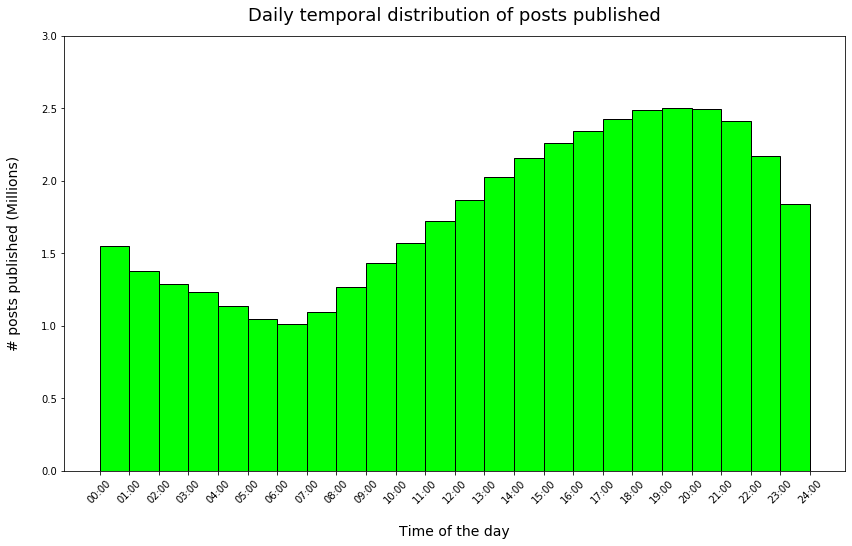

In [10]:
functions.plot_posts_time(posts_time)

In [11]:
time_intervals = [(6,11), (11,14), (14,17), (17,20), (20,24), (0,3), (3,6)]

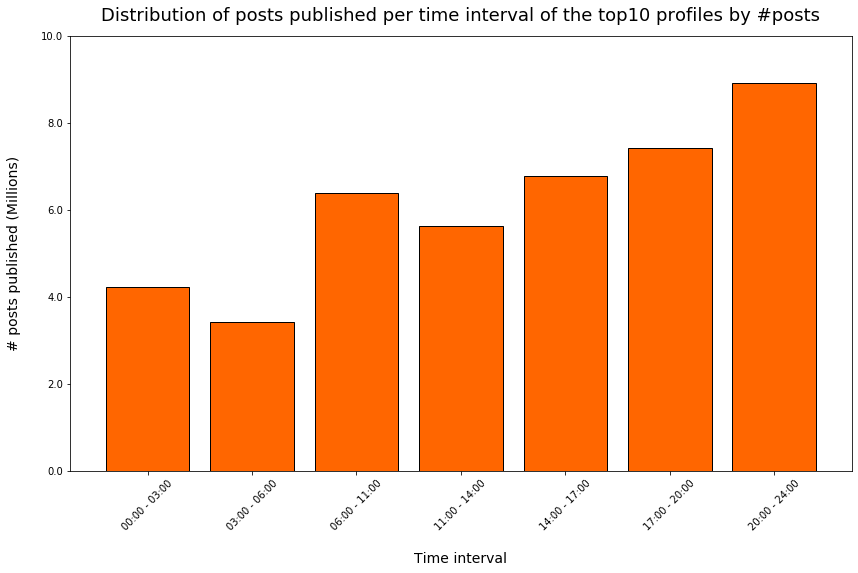

In [12]:
functions.plot_posts_time_custom(posts_time, time_intervals)

## [RQ4] *Enhancing our analysis (as permitted by dataset consistency)*

In [22]:
posts_reader = functions.initialize_posts_reader()

In [ ]:
profile_posts_map = functions.build_profile_posts_map(posts_reader)
posts = functions.posts_by_top_profile_ids(profile_posts_map,
                                           profiles_df[profiles_df["profile_id"]!=""].dropna(subset=["profile_id"]), 10)

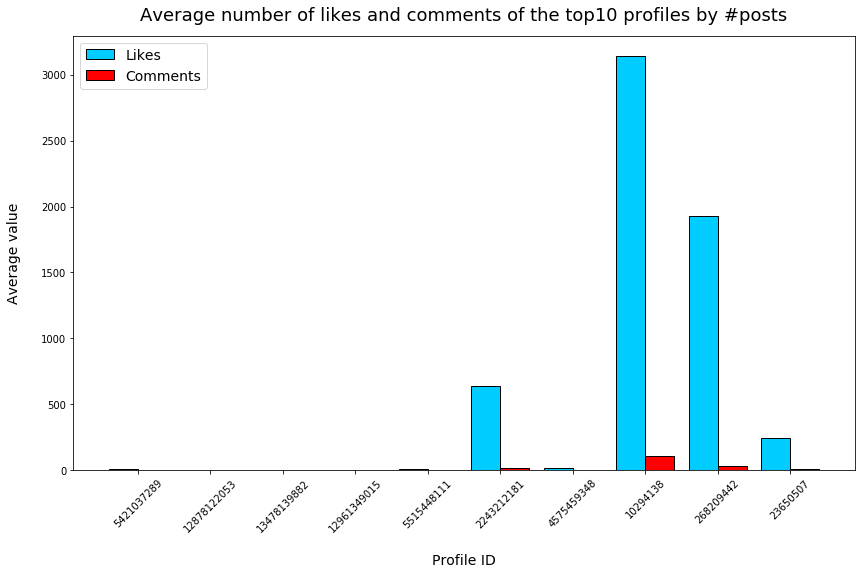

In [24]:
functions.plot_avg_stats_top10(posts)

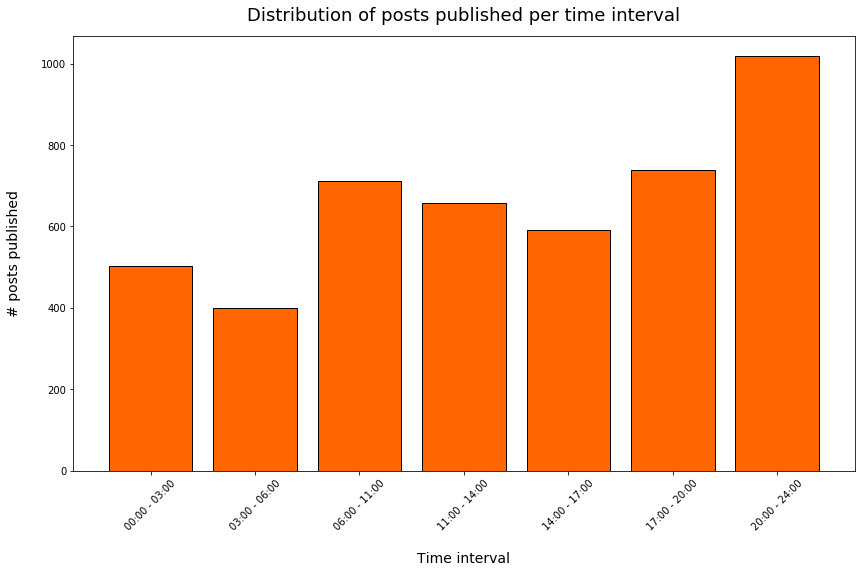

In [25]:
functions.plot_posts_top10(posts, time_intervals)

Although we are dealing with a *significantly smaller amount of posts*, the sample seems to be **representative** of the whole dataset in terms of posts publication times. In fact, the temporal distribution - according to the given time intervals - of the posts by the *top 10 profiles* **resembles** the one of *all the posts* in the complete dataset (plotted in **[RQ3]**)

## [RQ5]  *The most influential users*

<h3>5.1 The most ten popolar users in term of followers</h3>

In [125]:
## Sorting users by number of follwoer in descending order, 
## so that at first position we will have the one with most follower (the most influential)
profiles_df = profiles_df.sort_values(by='followers', ascending=False)

In [126]:
# Print the 10 most influential users
profiles_df.head(n=10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3416684,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,20824486,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,187619120,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2125506698,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,496865116,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,23410080,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,24239929,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,50417061,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,907025384,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


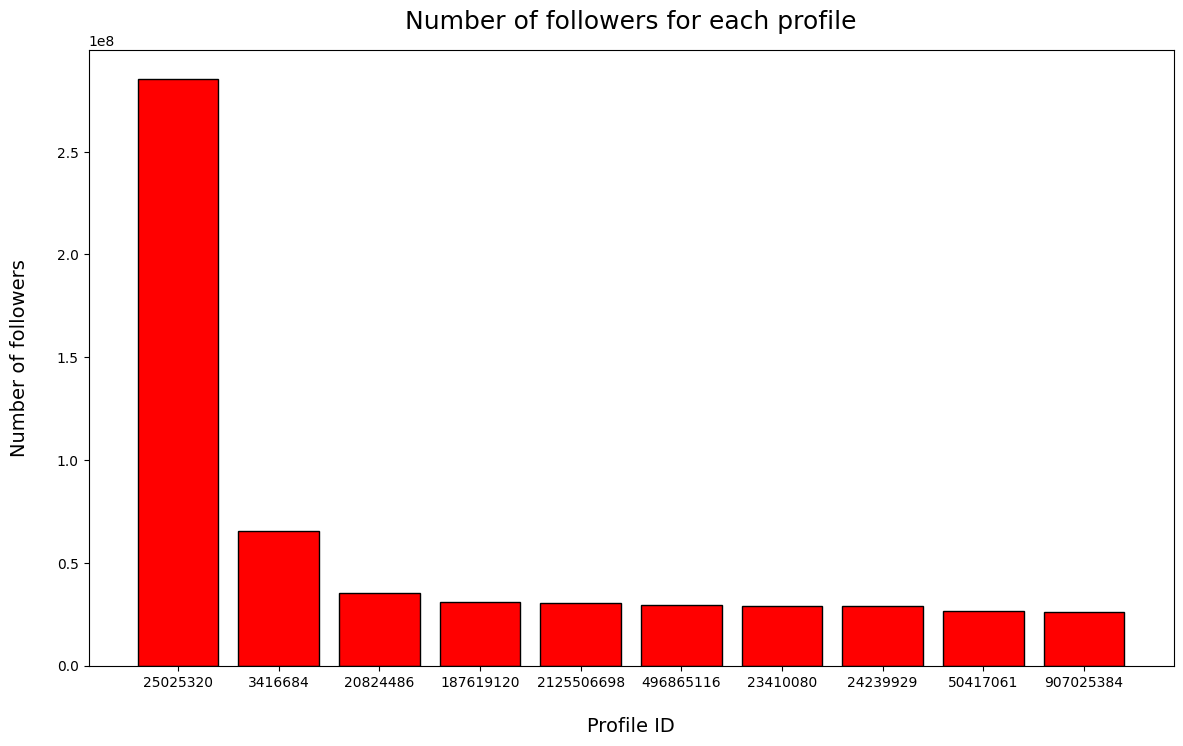

In [128]:
first_ten = profiles_df.head(10)
functions.plot_n_followers(first_ten)

<h4>5.1 The most ten popolar users's number of posts</h4>

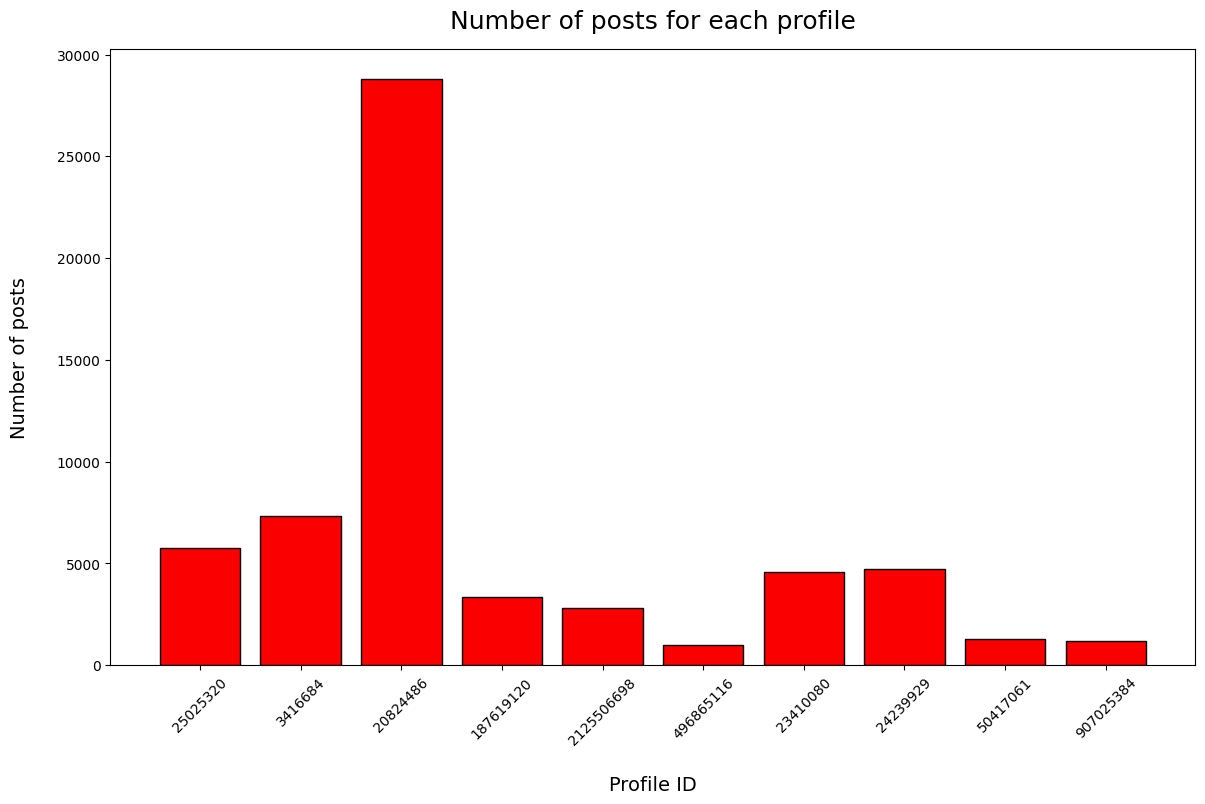

In [129]:
first_ten = profiles_df.head(10)
functions.plot_n_posts(first_ten)

<h3>5.2 The most influential user is Instagram itself</h3>

In [130]:
profiles_df.head(n=1)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False


<h3>5.3 The most frequent areas on their posts and the times that every location has been visited</h3>

In [131]:
#Get the most influential user's id, number of posts and followers
# The most influential user will be on top since the DataFrame is sorted
inf_n_posts = profiles_df['n_posts'].iat[0]
inf_profile_id = profiles_df['profile_id'].iat[0]
inf_followers = profiles_df['followers'].iat[0]

In [134]:
inf_posts = functions.inf_posts(posts_reader,inf_profile_id, inf_n_posts)

In [138]:
## Here we take the column 'location_id' and, with the use of a Counter,
## we count the occurences of every location Instagram registered in, so we can take
## the most ones
location_cnt = Counter(inf_posts.loc[:,'location_id'])
most_location_id = location_cnt.most_common(10)

As we can see here, we don't have a location that comes up more than once

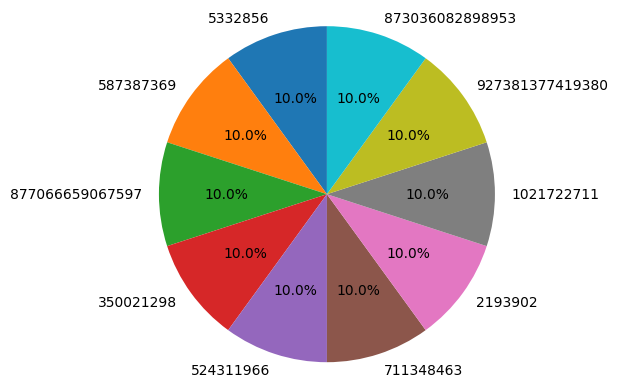

In [139]:
functions.plot_most_visited_locations(most_location_id)

In [140]:
## We only keep the ids since we only need them to filter locations
most_visited_locations = functions.getMostVisitedLocations([loc_id for loc_id,times in most_location_id], locations_df)

In [141]:
## Most visited locations details
most_visited_locations.to_html(formatters={'Name': lambda x: '<b>' + x + '</b>'})
most_visited_locations

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
45930,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,US,(214) 979-1111,False,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
60533,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
96048,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,PE,NaN,False,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
136417,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,CA,+1 780-968-8445,False,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
573108,891690,2193902,Porto Vecchio,Rue De La Citadelle,20137,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,porto-vecchio,NaN,2019-06-06 05:51:26.121
594752,916365,1021722711,Falla Maestro Gozalbo - Conde de Altea,"Calle Conde Altea, 5",46005,Valencia,NaN,ES,+34 963 95 39 24,False,...,Valencia,valencia,ES,Spain,-0.369870,39.465309,fallamaestrogozalbo,falla-maestro-gozalbo-conde-de-altea,http://www.fallamaestrogozalbo.com/,2019-06-07 06:13:12.712
626047,951387,927381377419380,Novi Sad Serbia,Руменачки пут,21000,"Novi Sad, Serbia",NaN,RS,NaN,False,...,NaN,NaN,NaN,NaN,19.836900,45.251700,NaN,novi-sad-serbia,https://novisad.com,2019-06-08 15:38:40.302
650437,976713,873036082898953,Mt Kosciuszko,Kosciuszko Summit Walk,2627,Kosciuszko,NaN,AU,NaN,False,...,NaN,NaN,NaN,NaN,148.263975,-36.456525,NaN,mt-kosciuszko,http://www.nationalparks.nsw.gov.au/visit-a-pa...,2019-06-09 17:25:36.519
844688,553843,524311966,Brodie Castle,Off A96,IV36 2TE,Forres,NaN,GB,01309 641371,False,...,NaN,NaN,NaN,NaN,-3.708948,57.598415,BrodieCastleNTS,brodie-castle,http://www.nts.org.uk/Property/Brodie-Castle/,2019-05-20 06:54:27.693
845415,554622,711348463,Hadleigh Park,Chapel Lane,SS7 2PP,"Hadleigh, Essex",NaN,GB,01702 551072,False,...,St. James,st-james,GB,United Kingdom,0.595682,51.551175,HadleighPark,hadleigh-park,http://www.hadleigh-park.co.uk,2019-05-20 08:10:11.138


<h3>5.4 Number of picture only posts, video only posts e mixed posts </h3>

In [142]:
##Count the number of post for each type and the number of like for each type of post
resultDict = functions.countLikeAndCommentForPostType(inf_posts)
post_type_counter = resultDict['PostTypeCounter']
like_by_type = resultDict['LikeByType']
comments_by_type = resultDict['CommentsByType']

Based on the small posts sample we have, we can say that around 91,18% of Instagram's posts are just photos, the rest are videos only posts and he never posts mixed posts.

Post containing only photos: 91.1765%
Post containing only videos: 8.8235%
Post containing both: 0.0%


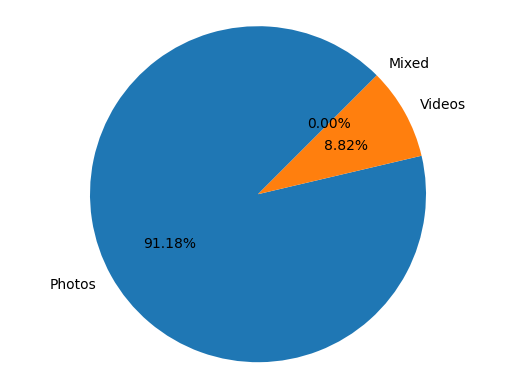

In [143]:
photo_percentage, video_percentage, multy_percentage = functions.calculatePostTypePercentage(post_type_counter, len(inf_posts))

print('Post containing only photos: {}%'.format(photo_percentage))
print('Post containing only videos: {}%'.format(video_percentage))
print('Post containing both: {}%'.format(multy_percentage))

functions.plot_post_by_type(photo_percentage, video_percentage, multy_percentage)

<h3>5.5 Number of likes and comments for type of posts</h3>

Based on our analysis of the small sample we have, we can say that just a small percentage of followers is actually following Instagram's account actively. 
In fact, likes percentage does not reach 0.5% in any of the cases. Also, photos' likes are slightly higher that videos' ones.

In [144]:
photo_likes_avg = int(round(like_by_type['1'] / post_type_counter['1'], 0))
videos_likes_avg = int(round(like_by_type['2'] / post_type_counter['2'], 0))

print('On average, post containing only photos get {} likes.'.format(photo_likes_avg))
print('On average, post containing only videos get {} likes.'.format(videos_likes_avg))

perc_photo_likers = round(100*photo_likes_avg/inf_followers, 4)
perc_video_likers = round(100*videos_likes_avg/inf_followers, 4)

print('On average, {}% of the followers likes post containing only photos.'.format(perc_photo_likers))
print('On average, {}% of the followers likes post containing only video.'.format(perc_video_likers))

On average, post containing only photos get 905933 likes.
On average, post containing only videos get 593410 likes.
On average, 0.3174% of the followers likes post containing only photos.
On average, 0.2079% of the followers likes post containing only video.


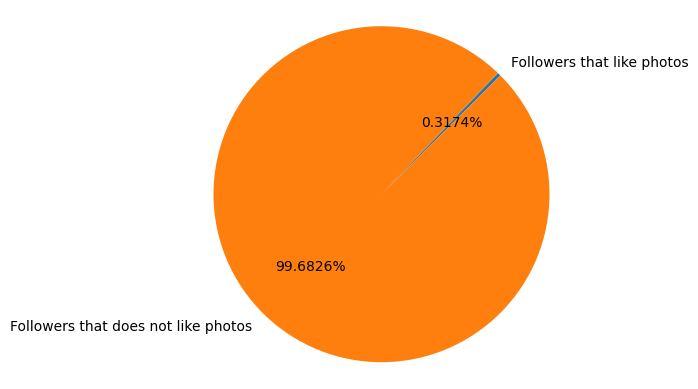

In [145]:
functions.plot_compared_to_followers(perc_photo_likers/100, 'photos','like')

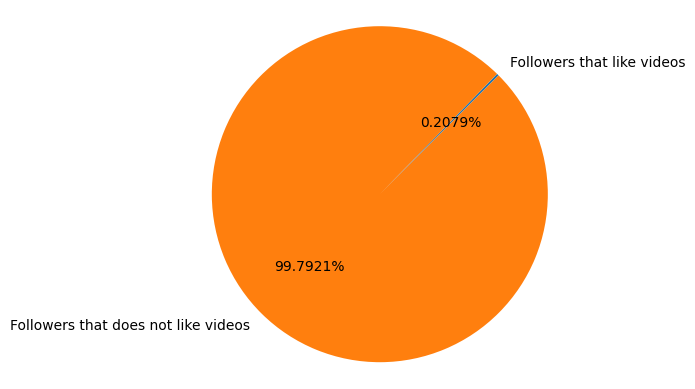

In [146]:
functions.plot_compared_to_followers(perc_video_likers/100, 'videos','like')

As we can see, when we talk about comments, the situation becomes even more extreme. In fact, the number of comments that are usually made, if compared to the number of followers, does not even reach 1%.

In [147]:
photo_comments_avg = int(round(comments_by_type['1'] / post_type_counter['1'], 0))
videos_comments_avg = int(round(comments_by_type['2'] / post_type_counter['2'], 0))

print('On average, post containing only photos get {} likes.'.format(photo_comments_avg))
print('On average, post containing only videos get {} likes.'.format(videos_comments_avg))

perc_photo_comm = round(100*photo_comments_avg/inf_followers, 4)
perc_video_comm = round(100*videos_comments_avg/inf_followers, 4)

print('On average, {}% of the followers likes post containing only photos.'.format(perc_photo_comm))
print('On average, {}% of the followers likes post containing only video.'.format(perc_video_comm))

On average, post containing only photos get 6703 likes.
On average, post containing only videos get 5749 likes.
On average, 0.0023% of the followers likes post containing only photos.
On average, 0.002% of the followers likes post containing only video.


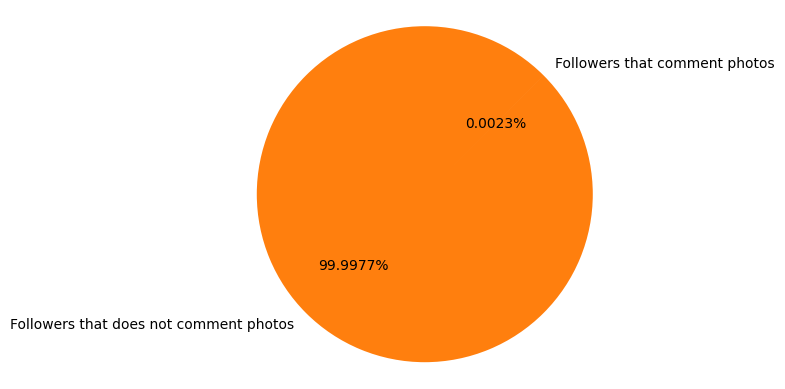

In [148]:
functions.plot_compared_to_followers(perc_photo_comm/100, 'photos','comment')

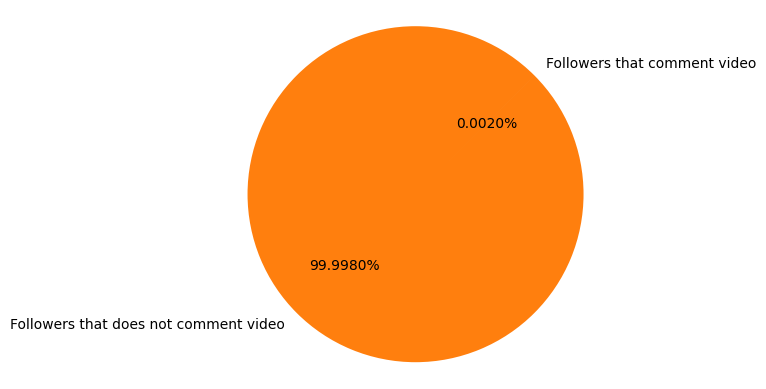

In [149]:
functions.plot_compared_to_followers(perc_video_comm/100, 'video','comment')

## [RQ6]  *User posting effectiveness analysis*

In [3]:
posts_df = functions.read_csv(["profile_id", "cts", "numbr_likes", "number_comments"], r'D:\Data\instagram_posts.csv', 43, converters={"cts": str})
posts_df = posts_df.sort_values(by='cts')

### 1. Top 3 users that publish posts more frequently

In order to compute the average time window between post publications, this quantity is first calculated for each user and then the final global average is extracted. In the process all profiles that have only one post published are not taken into account.

In [4]:
functions.time_avg(posts_df)

The average time window between posts is: 76 days and 1026 minutes


The following three profiles are the ones that are present in the profiles dataframe with the lowest average time window

Top 3 profiles that post the most frequently (with no NaNs):
           profile_id profile_name  following  followers  n_posts  n_posts_found       freq  avg_likes  avg_comments
666399   8.278512e+09   msidney087     7500.0      206.0     18.0           12.0  1036800.0   5.083333          0.25
1295046  6.109198e+09  no.name7291     2435.0       76.0     13.0           12.0  1036800.0  58.750000          0.25
499352   8.996413e+09     5588kkll     7328.0      454.0      7.0            7.0   302400.0  43.285714          2.00

Top 3 profiles that post the most frequently that had more than 10 posts found in the dataset (with no NaNs):
           profile_id profile_name  following  followers  n_posts  n_posts_found       freq  avg_likes  avg_comments
666399   8.278512e+09   msidney087     7500.0      206.0     18.0           12.0  1036800.0   5.083333          0.25
1295046  6.109198e+09  no.name7291     2435.0       76.0     13.0           12.0  1036800.0  58.750000          0.25
1004065  

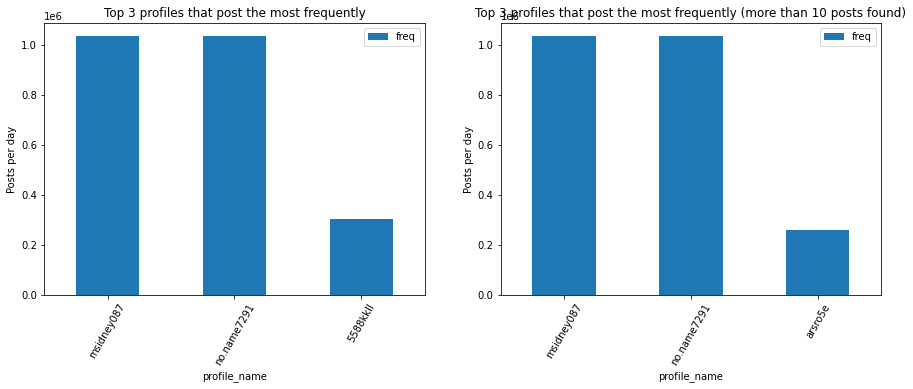

In [2]:
functions.highest_freqs()

From the chart it can be seen that sorting merely by the highest frequency do not paint a realistic picture of the features we are interested in. In fact, the top profiles all have few posts in a very short time window, meaning that a significant trend for frequency, followers and following might not be discovered from this example.

### 2. Time intervals analysis

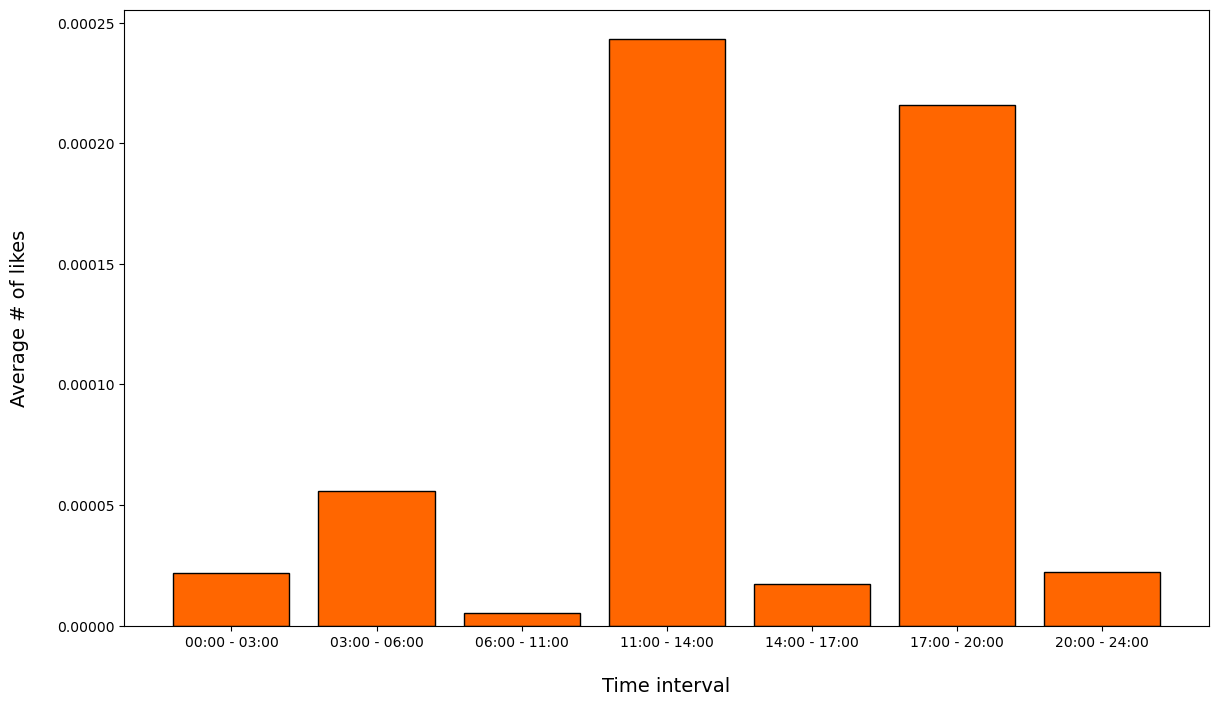

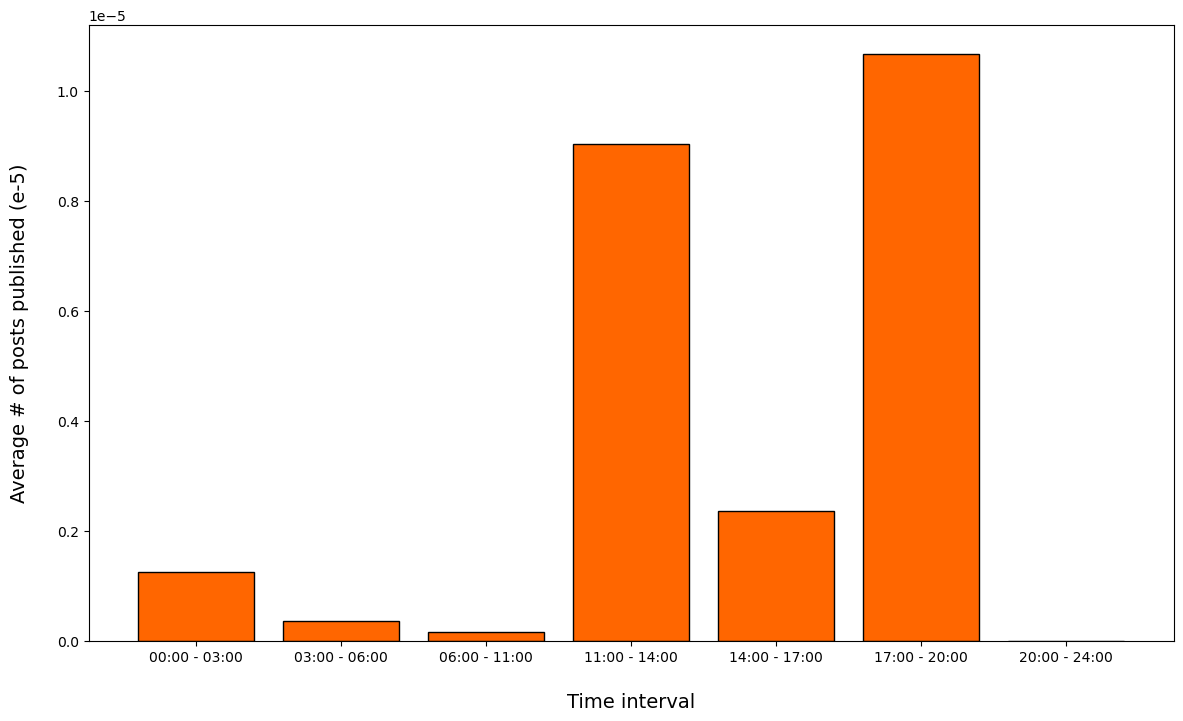

In [5]:
functions.plot_time_intervals_stats(posts_df)

Looking at the plots, it can be seen that the posts published in the time intervals 11:00-14:00 and 17:00-20:00 have the highest number of comments and likes, this behaviour can probably be due to the time window being close to the free time windows of the average working person.

## [RQ7] *Calculating probabilities - some engaging figures*

### What's the probability that a post receives more than 20% likes of the number of followers a user has?
This question can have several answers depending on your assumptions. The straightforward approach would be to to assume any arbitrary account as a "user" and construct an empirical CDF of the likes to followers ratio. 

Given our data we do not know exactly how many followers does the user has when they are publishıng their posts. A simple assumption would be to assume that the reported fallower account i a close enough approximate. (and it is asymptotically 0)

\begin{equation}
\begin{aligned}
Rate_{p,t_1} &= \frac{(likes)_{p,t_1}}{(followers)_{u,t_1}} \\
&= \frac{(likes)_{p,t_1}}{(followers)_{u,t_2} + (\Delta followers)_{t_1,t_2} }
\end{aligned}
\end{equation}

for post $p \in P_u$ and user $u \in U$ where $P_u$ is the set of posts belonging to user $u$, and $U$ is the set of users. Indices $t_1$ and $t_2$ indicate the time the information was gathered. If the data was gathered randomly, we can assume that $\mathbb{E}[(\Delta followers)_{t_1,t_2}] = 0$. Therefore calculating the empirical CDF for the ratio with same and varying timestamps are asmptotically equivalent.


Read 42710197 rows and columns from instagram_posts.csv!
Read 4509586 rows and columns from instagram_profiles.csv!


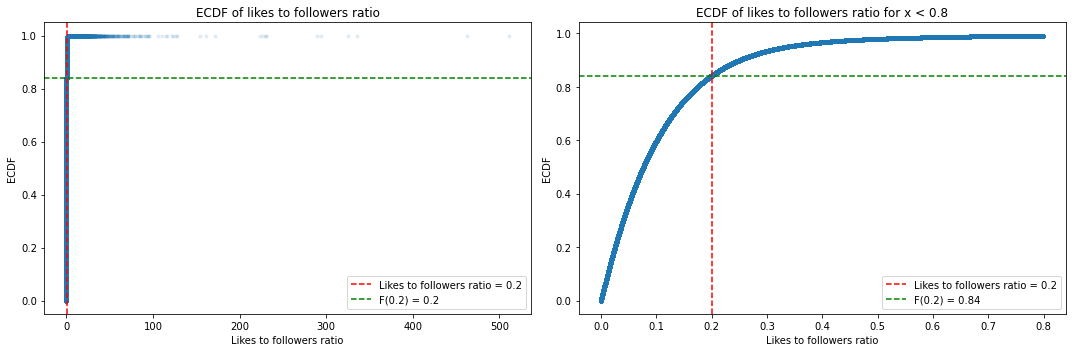

15.72% of the posts have a likes to followers ratio greater than 0.2.


In [3]:
functions.likes_to_follower()

### Do users return to locations?
This is rather a hard question given our dataset. Our aim is to check whether a user has posted in the same location. There are certain limiting factors,
* We do not know all the posts for a given user, thus we will have one-sided errors favoring that the user has not returned to the location. 
* Again users can send to two posts in a row that are in the same location.

The best way we have came up with to approximate a random experiment is to,

1. consider the first post for a given user,
2. filter the users without a second post atleast 24 hours later,
3. and the outcome is labeled positive if there exists a post with the identitical location ID with the initial post.

Read 42710197 rows and columns from instagram_posts.csv!
Percentage of profiles that visited the first location later than 24 hours: 33.58%


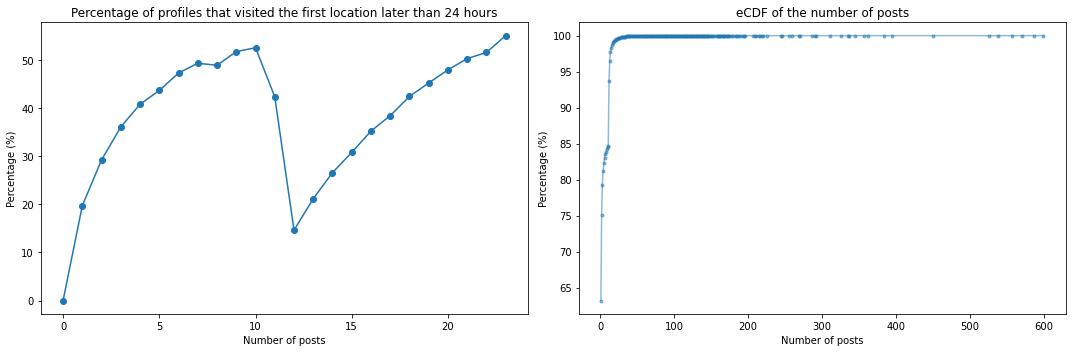

In [4]:
functions.return_to_locs()

### Interpreting our results

Based on our results, given users post more than once, 84.29% of the time a post is followed by another post in the same location after 24 hours and 76.47% of the time within 7 days. At first look, these numbers may seem quite high for an average Instagram user. However, our dataset includes a large amount of business acounts, they tend to post in the same location. For example, if its an account for a bar, it will usually tag the location of the bar. We can improve our analysis by differentiating between types of users, i.e. whether if it is a business account. 

Furthermore, the filters that we have applied to the dataset may have caused bias. In order to reduce our bias, we could better define our target users. Another problem that we face that a user can freely post content in the same location weeks later even if they have not been to that place in reality.

We have also plotted the rate of returning to locations based on the number of posts a user has. We were able to detect users returning to locations more frequently when they have more posts.

## [RQ8] *Hypothesis testing*

### Does more "likes" also mean more comments?
We start by plotting a scatter as instructed. We will work with two datasets, the first one is the original and the second one is where the outliers are removed. The outliers are removed by removing the rows where the values do not fall in the range 3 standard deviations from the mean.

Read 42710197 rows and columns from instagram_posts.csv!


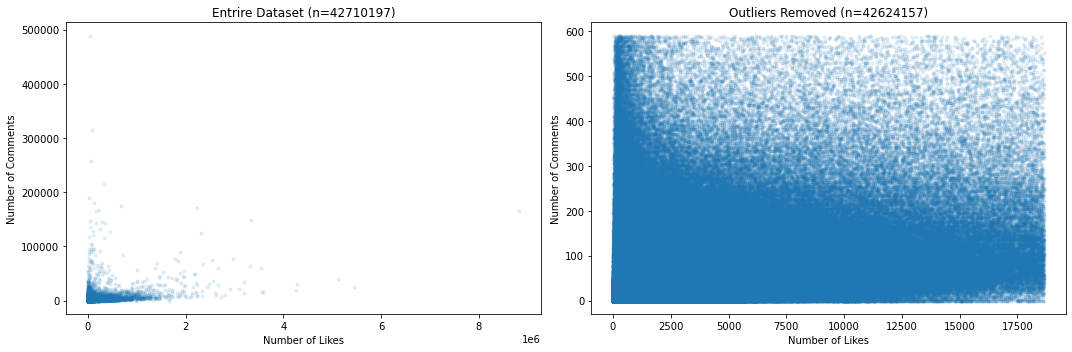

In [5]:
functions.scatter_likes_comments()

From the scatter plots above, we somewhat see a positive relationship between the two variables. However the visual intrepetation is relatively hard in this case since the variables are by design strictly positive and most of them are clustered in the left lower corner, thus we will further support our insticts by statistical methods in the section below.

### Testing the relationship between likes and comments

To test whether there is a significant relationship between number of likes and number of comments, simply, we will perform a linear regression. First regression will be level-level and second will be log-log.

There is no statistical tests to compare models since they are not nested. Moving on we will use the log-log model, since it has a better (lower) BIC score, thus reflects the reality more acurately.

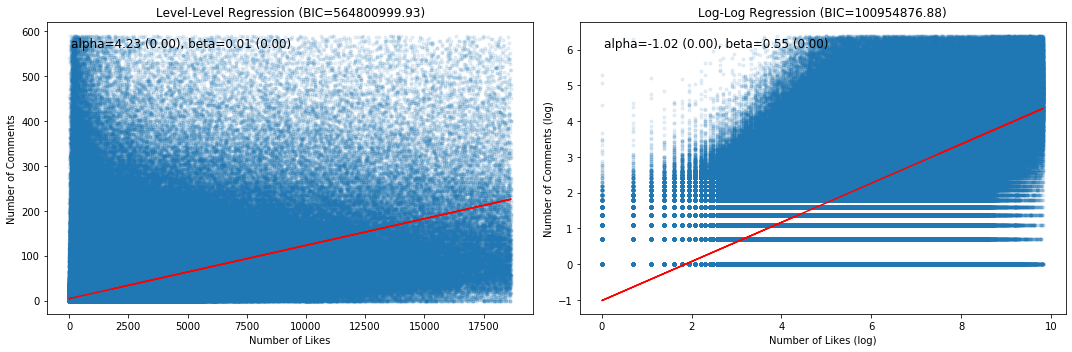

In [2]:
functions.testing_likes_comments()

In both models, the t-statistics results implies that there is significant relationship between number of likes and comments. In the plot above we have reported the p-values, and both of them are below 0.05.

Note that the Jarque-Bera test is also rejected, that is the errors do not follow a normal distrubution. This is an underlying assumption of the t-test. Therefore, we can not test the relationship between number of likes and comments
ideally we would like to find a distrubution that fits the errors and then we can test the number of comments parameter whether it is significantly different than 0. 

### What's the distribution of followers? 
Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

Read 4509586 rows and columns from instagram_profiles.csv!


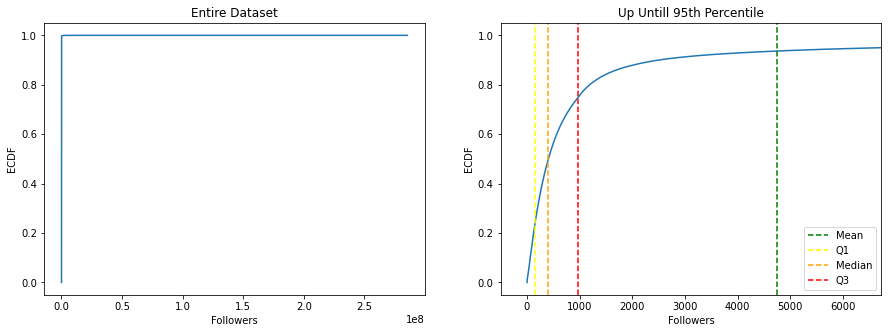

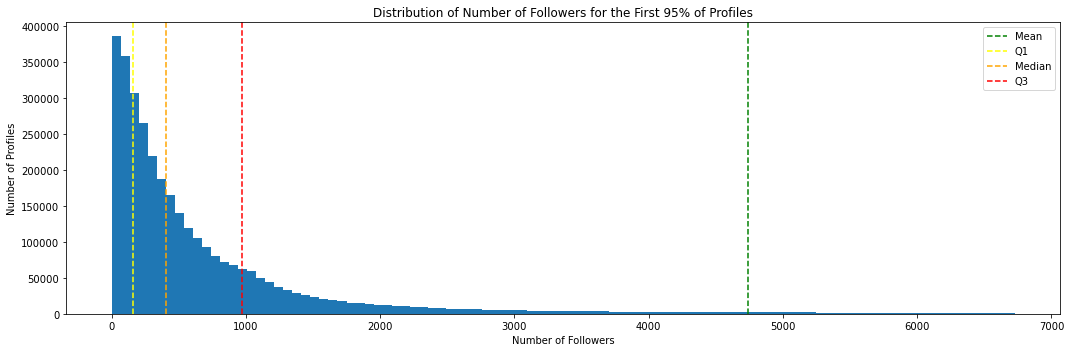

In [7]:
functions.followers_distrubution()

#### Intrpeting the plots
From the plots above we see that the mean is much larger than the median, even compared to Q3. This means that the data is skewed to the right. Moreover, there are extreme values which made impossible to vizualize the entire data in a linear scale. The extreme values drag the mean to the right. 

### What are histograms, bar plots, scatterplots and pie charts used for?

* Histograms are used to visualize the frequency of a numerical variable, and the objective is to discover the variable's distrubution. With a bar chart you can achieve a similar image, however that is not the goal of a bar chart. Bar charts partition the data based on certain characteristic (does not have to be numerical ranges) and plots bars where the height is dependent to a metric (does not have to be frequency). The main goal is to compare how different groups of data perform acccording to the preferred metric.
* Scatter plots are used to see relation between two variables. In a 2-dimensional scatterplot, you assign variables to axises and plot each observation as a point on the graph.
* Pie charts are mainly used to visualize the partitioning of categorical data. For example, in a previous exercise, we have used a pie chart to visualize the shares of accounts that are specified as business acccounts or not.

### What insights can you extract from a Box Plot?

Boxplot (or box and whisker plot) is a graphing method to compare (or simply visualize) distrubution of variables. Traditionally, it presents a lower bound, Q1 (1st quantile), median, Q3 (3rd quantile) and an upper bound. Q1 and Q3 are the borders of the boxes. The lower and the upper bounds are calculated by $\text{Q1} - 1.5 \times \text{IQR}$ and $ \text{Q3}- 1.5 \times \text{IQR}$ relatively. $\text{IQR}$ is the inter-quartile range, that is $\text{Q3}-\text{Q1}$. Below is an example where we have partitioned the data by their number of followers (using the perentiles), and boxplotted their numbers of posts.

Read 4509586 rows and columns from instagram_profiles.csv!


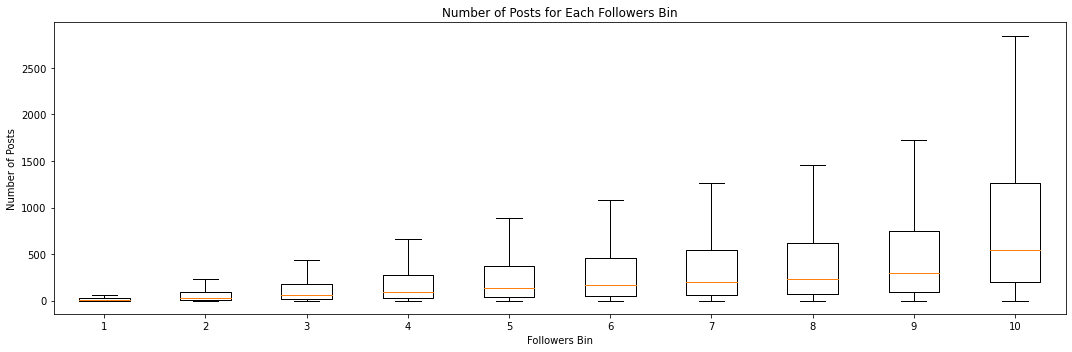

In [8]:
functions.boxplots()

Here you can see how the distrubution compares for followers in different percentiles. People with more followers tend to post more. Meanwhile, the median stays relatively stays the same in up untill the 9th group, thus an average user up until the 9th group post in similar capacity.

# Bonus points

## [a] *Posts publishing frequency analysis*

In [5]:
posts_reader = functions.initialize_posts_reader()

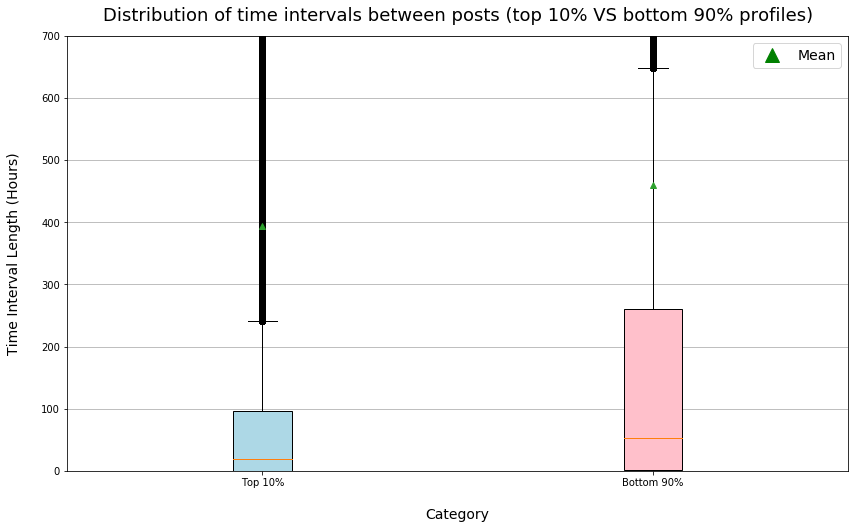

In [6]:
functions.plot_two_categories(profiles_df, posts_reader)

The box plots show that profiles in the *top 10%* by followers exhibit on average a **smaller time interval** between posts, i.e. they tend to publish posts with a higher frequency with respect to the rest of the profiles. It should however be noticed that, in order to perform a *quantitative assessment* of the frequency values, the *median* of the two distributions might provide a **much more reliable estimate**, being more robust and less sensitive to outliers. The *mean* for both the categories lies above the 3rd quartile of the distribution - with the *top 10%* one being even *above the upper whisker* (*Upper Whisker = Upper Quartile + 1.5 * Interquartile Range*) - meaning that  outliers cause the distributions to be **highly right-skewed**, while the two *medians*, although exhibiting the *same trend* in terms of publishing frequency, are significantly *smaller* in values.

## [b] *Same Day? Same Week?*

In [9]:
functions.same_day_same_week()

Read 42710197 rows and columns from instagram_posts.csv!
940467 of 11331493 profiles have posted more than once in the same location on the same day which makes 8.30% of all profiles.
3383874 of 28625055 posts have been posted more than once in the same location on the same day which makes 11.82% of all posts.

1504319 of 11331493 profiles have posted more than once in the same location in the same week which makes 13.28% of all profiles.
6415093 of 28625055 posts have been posted more than once in the same location in the same week which makes 22.41% of all posts.


## [C] *Text Mining Analysis*

In order to extract additional insight, the content of the **Description** field of the posts, accurately preprocessed, was passed as input to a *K-means* clustering algorithm with parameter $K=25$.

**Preprocess steps:**

* Remove descriptions with non-ASCII characters
* Remove non-English descriptions
* Remove English stopwords
* Lemmatization

* Transform to TF-IDF vector (Input to K-means)

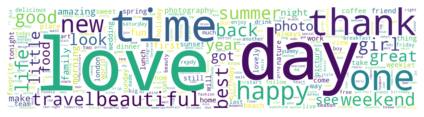

Cluster 0: n=5276  	cup, coffee, tea, world, final, day, good, great, morning, just
Cluster 1: n=3840294  	night, good, new, like, just, best, summer, beautiful, weekend, life
Cluster 2: n=44669  	come, pm, tonight, join, new, check, day, true, tomorrow, night
Cluster 3: n=15085  	miss, gonna, don, going, love, day, place, summer, little, year
Cluster 4: n=3437  	spicy, chicken, food, foodie, foodporn, ramen, delicious, yummy, instafood, lunch
Cluster 5: n=11772  	cool, pretty, love, day, place, just, super, like, really, summer
Cluster 6: n=67183  	love, life, family, place, thank, just, little, girl, new, beautiful
Cluster 7: n=7618  	burger, food, foodporn, foodie, cheese, vegan, delicious, lunch, chicken, bacon
Cluster 8: n=235  	chico, lie, summer, love, california, monde, new, time, congrats, fun
Cluster 9: n=10981  	stay, tuned, new, just, forever, soon, hydrated, coming, day, away
Cluster 10: n=27153  	beach, sea, day, sunset, sun, summer, ocean, beautiful, sand, travel
Cluster

In [1]:
functions.text_mining()

The words "love", "day", "time", "happy" are amongst the most popular words, as shown by the *wordcloud*, however they seem not to characterize any cluster. Even if some clusters exhibit a degree of overlap, most of them could be describing a topic: some examples are *Cluster 4: Food*, *Cluster 12: Coffee*, *Cluster 23: Nature*.

# Algorithmic Questions

## [AQ1]

This algorithm outputs all the permutations of a given list of items. Starting from the smallest index, it iteratively changes the the position of the items that comes after itself. This results in producing all the permutations.

In [7]:
def f1(sequence, end):
    for i in range(end): print(sequence[i], end="")
    print()

def f2(sequence, start, end):
    if start==end:
        f1(sequence, end)
    else:
        for i in range(start, end):
            
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            
            f2(sequence, start+1, end)
            
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp

### Example:

**Input string**: "BLU"

In [9]:
string = ["B","L","U"]
N = len(string)
f2(string, 0, N)

BLU
BUL
LBU
LUB
ULB
UBL


$f2$ is called with $start=0$, $end=3$. The *if condition* to call $f1$ *is not met* so the first cycle starts with $i=0$.

The first part of the cycle swaps the letter "B" with itself, and the same happens for letter "L" and letter "U" when $f2$ is called with $start=1$ and $start=2$.

When $f2$ is called again, this time with $start=3$, the first *if condition* is met and the string $BLU$ is outputted.

The cycle of the last iteration ends reswapping the letter $U$ with itself; afterwards, its $for loop$ ends.

The cycle of the second to last iteration is resumed, it reswaps $L$ with itself and then the second iteration of its $for loop$ begins ($i=2$).

The letters $L$ and $U$ are swapped; the function $f2$ is called again, swapping $L$ with itself and calling f2 again. The condition to call $f1$ is met for the second time and the string $BUL$ is outputted.

The cycle of the last call of $f2$ ends reswapping $L$ with itself, then the second-last cycle swaps $L$ and $U$ again and the $for loop$ ceases since its index has reached the end of the range.

The very first $for loop$ resumes ($i=1$): it swaps $B$ with $L$ and then calls iteratively $f2$ as described above to output first the string $LBU$ and then $LUB$. When this process ends, the string is restored to default and passed again to the final step of the first cycle.

Repeating the steps above, the final permutations $ULB$ and $UBL$ will be outputted.

### Description of the algorithm:

The $f1$ function outputs the string when $f2$ has finished computing it.

The $f2$ function rearranges the elements of the string in the following way:

* If condition to call f1
    
* Each iteration of this cycle *swaps* the two elements of the set corresponding to the $i-th$ and $start$ positions, then passes the edited string recursively to $f2$ increasing $start$ value by $1$; doing so, given that $i$ starts from $start$, the first $N$ recursions leave the string untouched (as the first permutation computed is the identical one)
    
* When the condition of $f1$ *is met* the recursion ends, it reswaps the last two elements previously swapped and the iterative index of the second last recursion *increases*. Now the swap part of the cycle swaps the different pair $i+1$ and $start$; when the cycle of the second last recursion *finishes* its steps, the cycle of the previous recursion *resumes*, it starts swapping the element that was previously left *untouched* and calls $f2$ again to compute the permutation of the leftover elements of the string. Iterating this process, the algorithm computes all the possible swaps of elements (permutations) *only once*

### Running-time complexity:

Say we have $n$ items in the list. The first iteration calls $n$ functions, those $n$ functions call $n-1$ functions and it goes until where $n!$ functions call f1. This accumulates to $n+n(n-1)+n(n-1)(n-2)+\ldots+n!$ functions being executed. For large $n$, we can simplify by using the formula $e^x=1+x+\frac{x^2}{2 !}+\frac{x^3}{3 !}+\ldots$ such that

\begin{equation}
\begin{aligned}
n+n(n-1)+n(n-1)(n-2)+\ldots+n! &= n! \sum_{k=1}^{n-1} \frac{1}{k!} \\
&\approxeq n!e -1
\end{aligned}
\end{equation}

thus we can say it has the $O(n!)$ time complexity.

## [AQ2]

### Recursive algorithm

**Base Case:** $N <= 1$ &rarr;
*No cut can be performed*, hence the *maximum product* of sub-pieces is 0

**Recursive Case:** $N >= 2$ &rarr;
For each of the possible $N-1$ partitions into $2$ pieces of length $(i, N-i)$ for $1 <= i < N-1$, check whether the cut produces the *maximum product* or it is possible to obtain a larger result by *splitting recursively* the piece of length $N-i$, while leaving the piece of length $i$ untouched, then return the *maximum value*

In [4]:
def MaxProdRec(N):

    # Base case: no cut can be performed
    if N <= 1:
        return 0

    # Initialize result to 0
    result = 0

    # If N>=2, check for each possible partitions and store max product
    for i in range(1, N):
        result = max(result, max(i*(N-i), i*MaxProdRec(N-i)))

    # Return result
    return result

**Running-time complexity:** $O(2^N)$ <br/><br/>

**Base Case:** $T(1) = O(1)$

$$ T(N) = T(N-1) + T(N-2) + T(N-3) + \dots + T(1) $$

$$ T(N-1) = T(N-2) + T(N-3) + T(N-4) + \dots + T(1) $$

$$ \Longrightarrow T(N) = T(N-1) + T(N-1) = 2 \cdot T(N-1) = 2 \cdot 2 \cdot T(N-2) = \dots = 2^{i} \cdot T(N-i) $$

$$ When \; i=(N-1) \Longrightarrow T(N) = 2^{N-1} \cdot T(1) = O(2^{N}) $$

### Dynamic Programming

**DP idea:** in order to avoid *recomputing subproblems solutions*, build a table of length $N+1$ ($0$ based indexing) in *bottom-up fashion*, storing in position $i$ the solution to the subproblem for input length $i$

**Implementation:** initialize the DP table $maxProdArr$ with $0$*s*. Fill $maxProdArr[i]$, for $1 <= i < N$,  following the same procedure as in the **Recursive algorithm**, but retrieving the solution to the subproblem for input length $N-i$ from $maxProdArr[N-i]$ (instead of calling the function again, in recursive fashion). The solution to the problem (for input length $N$) can be found in $maxProdArr[N]$

In [5]:
def MaxProdDP(N):

    # Initialize DP table
    maxProdArr = [0 for x in range(0, N+1)]

    # Fill DP table (maxProdArr[n]: solution of MaxProd(n))
    for n in range(1, N+1):
        result = 0
        for i in range(1, n):
            result = max(result, max(i*(n-i), i*maxProdArr[n-i]))
        maxProdArr[n] = result

    # Return result
    return maxProdArr[N]

**Running-time complexity:** $O(N^2)$

* Initialize maxProdArr =  $O(N+1)$
* Outer cycle: $N$ iterations ($n = 1, \cdots , N$)
* Nested cycle: $n-1$ iterations for each outer iteration 

$$ \sum_{i=1}^{N}i = \frac{N(N-1)}{2} = \frac{N^2-N}{2} = O(N^2) $$

### Running Time Evaluation

In [6]:
input_sizes = [x for x in range(2,26)]

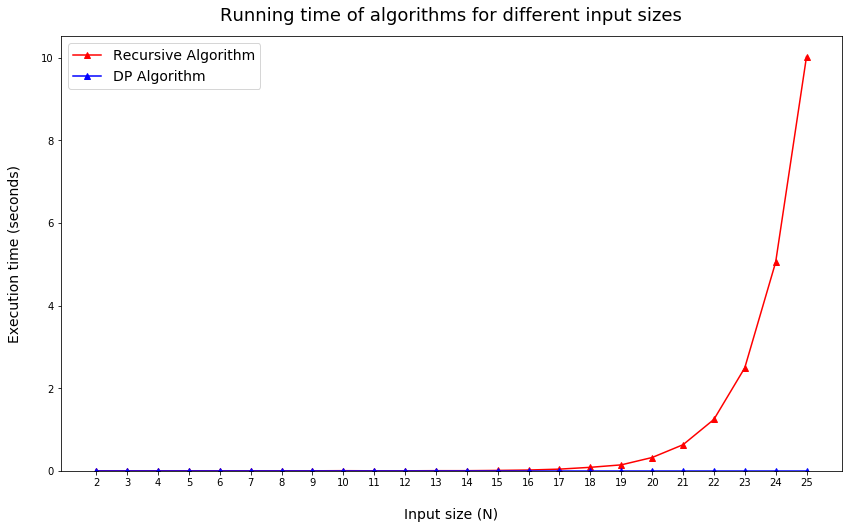

In [7]:
functions.plot_running_times([MaxProdRec, MaxProdDP], input_sizes)

The **exponential** shape of the execution time curve of the **recursive algorithm** is evident already at very small input sizes. In order to observe the **polynomial** shape *(degree = 2)* of the **dynamic programming** one, we increase the *number* of input sizes tested, as well as their *order of magnitude*.

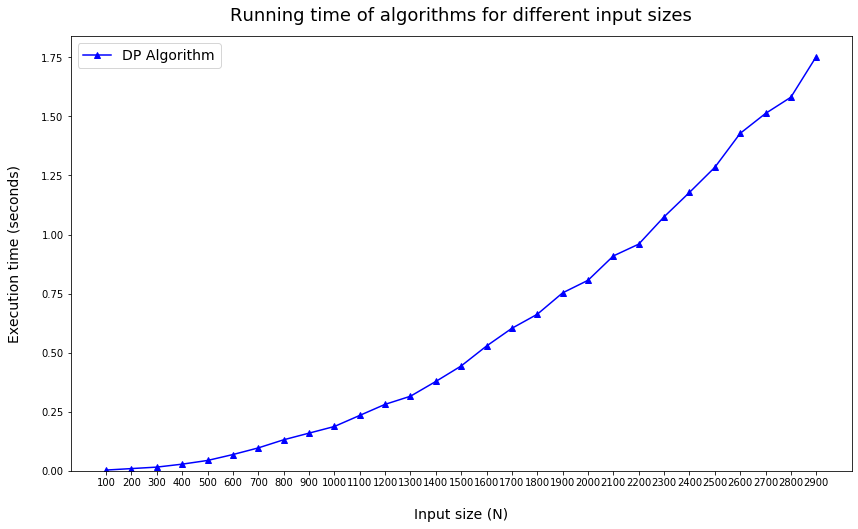

In [8]:
functions.plot_running_times([MaxProdDP], [x for x in range(100,3000,100)], "DP")

### Ad hoc algorithm

**Ad hoc idea:** the *max product solution* can be obtained by cutting the ribbon into the maximum number of subpieces of length $3$ allowing not to have any subpiece of length $1$; in fact, any number $K > 3$ can be split into $2$ *addends* $a + b = K$ having product $ab >= K$ *if and only if* $a,b >= 2$

**Proof:** $$ ab >= a+b \qquad a,b >0 $$ $$ ab-a-b >= 0 $$ $$ ab-a-b+1 >= 1 $$ $$ (a-1)(b-1) >= 1 \longrightarrow a,b >= 2 \longrightarrow K = a + b >= 4$$

**Implementation:**

* Handle specifically $N <= 3$ cases: $MaxProd = max(0, N-1)$ 
    * If $N <= 1$, *no cut can be performed*: $MaxProd = 0$
    * If $2 <= N <= 3$, the best option is cutting the ribbon into two pieces of lenght $1$ and $N-1$: $MaxProd = 1 \cdot (N-1) = N-1$


* When  $N > 3$:
    * Define $q$: *(maximum number of subpieces of length $3$ in ribbon of length $N$)* $-1$ $$ $$ $$ q = \lfloor(N-2)/3)\rfloor $$ <br/>
    * Define $r$: length of the *remaining piece* after cutting $q$ pieces of length $3$ $$ $$ $$ r = N - 3 \cdot q $$ <br/>
    * Compute the *product of the lenghts* of all the pieces: $$ MaxProd = 3^q \cdot r $$

In [9]:
def MaxProdLinear(N):

    if N <= 3:
        return max(0, N-1)

    q = (N-2)//3
    r = N - 3*q

    return pow(3, q)*r

**Running-time complexity:** $O(N)$

All intermediate operations can be performed in constant time $O(1)$; computing $ 3^ \left \lfloor \frac{N-2}{3} \right \rfloor $ requires a number of operations with grows **linearly** with respect to the input length $N$

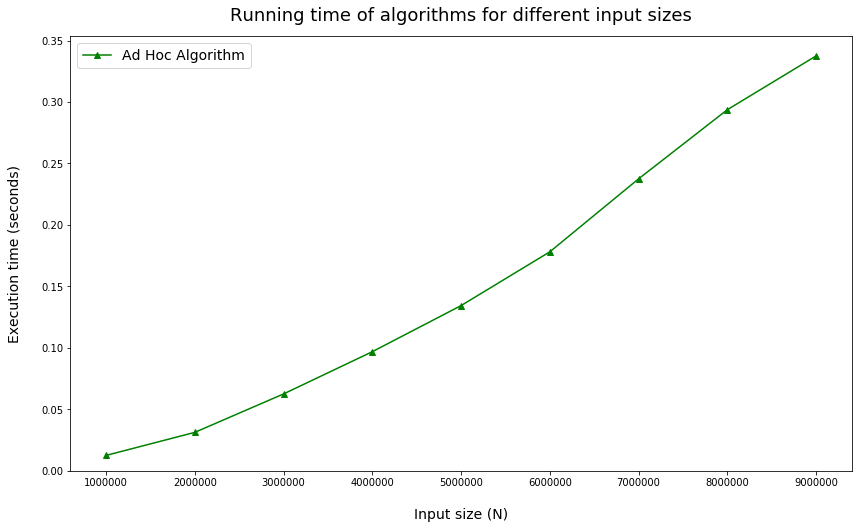

In [10]:
functions.plot_running_times([MaxProdLinear], [x for x in range(int(1e6),int(1e7),int(1e6))], "AH")